# Uma estratégia simples de investimento usando Python
---
## Cruzamento de médias móveis
Vamos implementar uma estratégia onde temos 2 médias móveis (de 9 e 20 períodos) do preço de fechamento da ação da Petrobras no ano de 2021. Quando a média de 9 cruza a de 20 para cima vamos comprar um lote, se a média cruza pra baixo vendemos.

### Disclaimer: Não é recomendação de investimento
Os dados foram obtidos usando a biblioteca MetaTrader5 e importadas como um csv.
Em outro momento posto mais sobre essa biblioteca e como pegar os dados de forma sólida.

In [1]:
import pandas as pd
import plotly.graph_objects as go

#Configuraçoes de exibição do pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1500)
pd.set_option('mode.chained_assignment', None)
pd.set_option('precision',2)


In [11]:
df = pd.read_csv('/Users/felipe/Desktop/dados/petr4.csv', index_col='time')
#df = pd.read_csv('/Users/felipe/Desktop/dados/petr4.csv', parse_dates=True)

In [12]:
df.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2013-09-03,13.58,13.78,13.41,13.49,38175,1,31405300
2013-09-04,13.37,13.62,13.32,13.55,28085,1,36873100
2013-09-05,13.56,14.32,13.54,14.11,41877,1,47894500
2013-09-06,14.31,14.48,14.04,14.28,35731,1,30772600
2013-09-09,14.29,14.64,14.29,14.61,33543,1,29700300


In [13]:
#Limpando colunas desnecessarias
df.drop('spread', axis=1, inplace=True)

In [14]:
df['MA20'] = df['close'].rolling(20).mean()
df['MA9']= df['close'].rolling(9).mean()

In [15]:
df.head()

,open,high,low,close,tick_volume,real_volume,MA20,MA9
time,,,,,,,,
2013-09-03,13.58,13.78,13.41,13.49,38175,31405300,NaN,NaN
2013-09-04,13.37,13.62,13.32,13.55,28085,36873100,NaN,NaN
2013-09-05,13.56,14.32,13.54,14.11,41877,47894500,NaN,NaN
2013-09-06,14.31,14.48,14.04,14.28,35731,30772600,NaN,NaN
2013-09-09,14.29,14.64,14.29,14.61,33543,29700300,NaN,NaN


In [16]:
df=df[['open','high', 'low', 'close', 'MA20', 'MA9', 'real_volume', 'tick_volume']]

In [17]:
df.head()

,open,high,low,close,MA20,MA9,real_volume,tick_volume
time,,,,,,,,
2013-09-03,13.58,13.78,13.41,13.49,NaN,NaN,31405300,38175
2013-09-04,13.37,13.62,13.32,13.55,NaN,NaN,36873100,28085
2013-09-05,13.56,14.32,13.54,14.11,NaN,NaN,47894500,41877
2013-09-06,14.31,14.48,14.04,14.28,NaN,NaN,30772600,35731
2013-09-09,14.29,14.64,14.29,14.61,NaN,NaN,29700300,33543


# Analisando 2021

In [18]:
#Trabalhando com a data
#Se a coluna de tempo nao for o indice utilizar esse codigo abaixo
#start_date = '2021-01-01'
#year_2021 = df['time']>start_date
#df_21 = df[year_2021]


#Se tomarmos o tempo como indice, utilizar loc
df21 = df.loc['2021-01-01':,]

In [19]:
df21.head()

,open,high,low,close,MA20,MA9,real_volume,tick_volume
time,,,,,,,,
2021-01-04,26.16,26.65,26.05,26.40,25.20,25.60,74719700,109323
2021-01-05,26.39,27.56,25.79,27.43,25.39,25.78,95181100,107389
2021-01-06,27.54,28.22,27.44,27.46,25.55,25.98,96562500,110107
2021-01-07,27.70,28.44,27.70,28.31,25.71,26.38,56171300,75579
2021-01-08,28.73,29.00,27.71,28.42,25.89,26.77,67136300,82901


In [ ]:
#Usando a data como index
df_21.index=df_21['time']

In [ ]:
df_21.head()

<AxesSubplot:xlabel='time'>

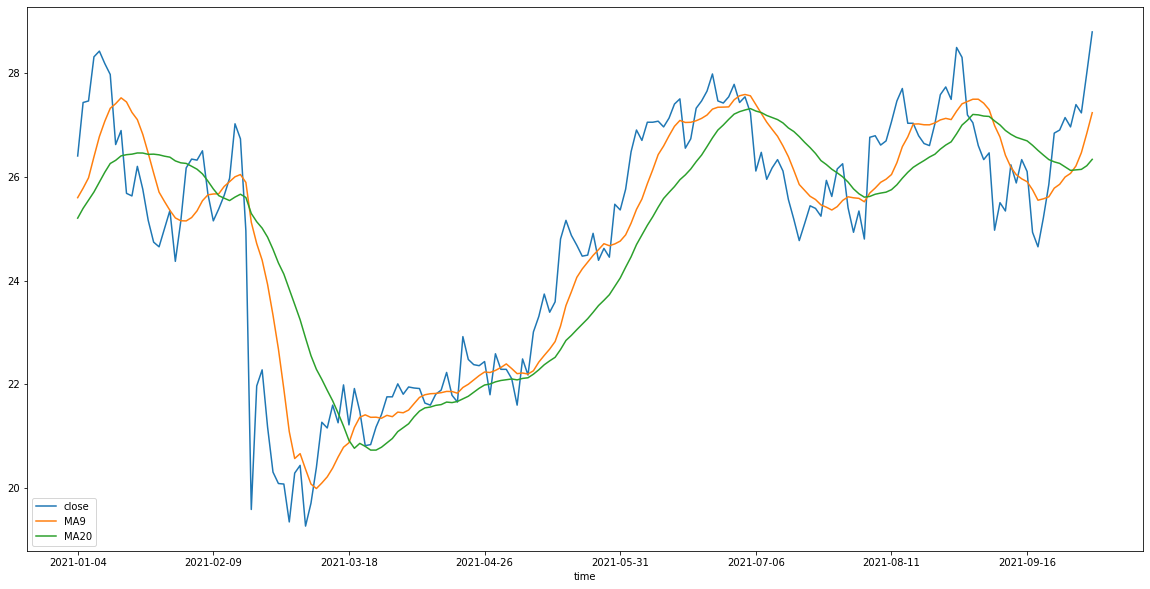

In [20]:
df21['close'].plot(figsize=(20, 10), legend=True)
df21['MA9'].plot(legend=True)
df21['MA20'].plot(legend=True)

In [22]:
df21['shares'] = [1 if df21.loc[ei,'MA9'] > df21.loc[ei,'MA20'] else 0 for ei in df21.index]

In [23]:
df21['close1'] = df21['close'].shift(-1)

In [36]:
df21['profit'] = [(df21.loc[ei,'close1']-df21.loc[ei,'close'])*100 
                  if df21.loc[ei,'shares']==1 
                  else 0 for ei in df21.index]

In [37]:
df21.head()

,open,high,low,close,MA20,MA9,real_volume,tick_volume,shares,close1,profit,wealth
time,,,,,,,,,,,,
2021-01-04,26.16,26.65,26.05,26.40,25.20,25.60,74719700,109323,1,27.43,103.0,1.03
2021-01-05,26.39,27.56,25.79,27.43,25.39,25.78,95181100,107389,1,27.46,3.0,1.06
2021-01-06,27.54,28.22,27.44,27.46,25.55,25.98,96562500,110107,1,28.31,85.0,1.91
2021-01-07,27.70,28.44,27.70,28.31,25.71,26.38,56171300,75579,1,28.42,11.0,2.02
2021-01-08,28.73,29.00,27.71,28.42,25.89,26.77,67136300,82901,1,28.18,-24.0,1.78


In [38]:
df21['wealth']=df21['profit'].cumsum()

In [44]:
df21.head(20)

,open,high,low,close,MA20,MA9,real_volume,tick_volume,shares,close1,profit,wealth
time,,,,,,,,,,,,
2021-01-04,26.16,26.65,26.05,26.40,25.20,25.60,74719700,109323,1,27.43,103.0,103.0
2021-01-05,26.39,27.56,25.79,27.43,25.39,25.78,95181100,107389,1,27.46,3.0,106.0
2021-01-06,27.54,28.22,27.44,27.46,25.55,25.98,96562500,110107,1,28.31,85.0,191.0
2021-01-07,27.70,28.44,27.70,28.31,25.71,26.38,56171300,75579,1,28.42,11.0,202.0
2021-01-08,28.73,29.00,27.71,28.42,25.89,26.77,67136300,82901,1,28.18,-24.0,178.0
2021-01-11,27.95,28.36,27.76,28.18,26.09,27.07,52896700,56067,1,27.97,-21.0,157.0
2021-01-12,28.42,28.82,27.97,27.97,26.26,27.32,65691900,78922,1,26.62,-135.0,22.0
2021-01-13,28.01,28.18,26.48,26.62,26.32,27.41,93826600,118700,1,26.89,27.0,49.0
2021-01-14,26.64,27.09,26.23,26.89,26.40,27.52,50745400,88268,1,25.68,-121.0,-72.0


In [40]:
print(f"Total money you win is {df21.loc[df21.index[-2], 'wealth']:.2f}")
print(f"Total money you spent is {df21.loc[df21.index[0], 'close']:.2f}")

Total money you win is -329.00
Total money you spent is 26.40


<AxesSubplot:xlabel='time'>

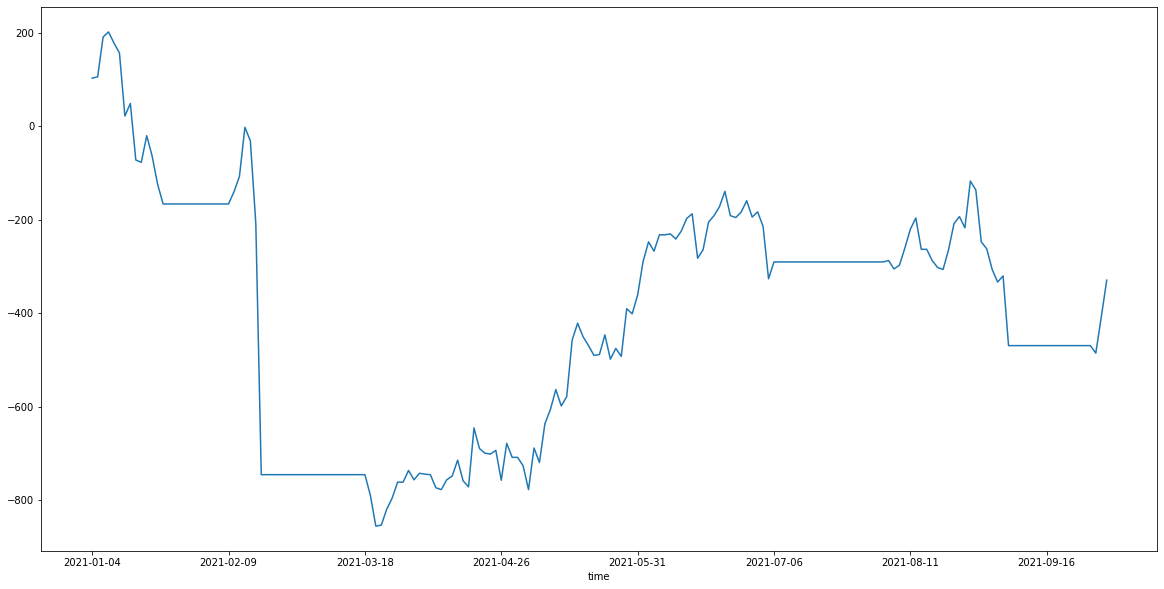

In [43]:
df21['wealth'].plot(figsize=(20,10))

In [ ]:
data=[go.Candlestick(x=df21['time'],
                open=df21['open'],
                high=df21['high'],
                low=df21['low'],
                close=df21['close'])]

In [ ]:
layout = go.Layout(autosize=False,
                  width=1850,
                  height=1000)

In [ ]:
fig = go.Figure(data, layout=layout)

fig.show()